# Magic Personality Matcher

## Grupo Onyrix

> Mario Vila Comesaña, Jesús Guimeráns Cordeiro, Javier Veloso Boubeta y Tania Guijarro Villavicencio

En este notebook se juntan los 3 datasets que encontramos para hacer un super-dataset y así conseguir una gran cantidad de ejemplos de todas las personalidades, porque todos los datasets tenían cantidades irregulares de datos de cada personalidad.

# Creación de dataset

Para usar como fuente encontramos varios datasets que podríamos usar y decidimos juntarlos todos para tener más datos, por si queremos ampliarla cantidad de datos usada para entrenamiento fácilmente.

Los datasets usados son los siguientes:
- [Twitter MBTI](https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset)
- [MBTI 1](https://www.kaggle.com/datasets/datasnaek/mbti-type)
- [MBTI 500](https://www.kaggle.com/datasets/zeyadkhalid/mbti-personality-types-500-dataset)

In [1]:
personality_num = {
    'ISTJ': 1,
    'ISFJ': 2,
    'INFJ': 3,
    'INTJ': 4,
    'ISTP': 5,
    'ISFP': 6,
    'INFP': 7,
    'INTP': 8,
    'ESTP': 9,
    'ESFP': 10,
    'ENFP': 11,
    'ENTP': 12,
    'ESTJ': 13,
    'ESFJ': 14,
    'ENFJ': 15,
    'ENTJ': 16
}

num_personality = {
    1: 'ISTJ',
    2: 'ISFJ',
    3: 'INFJ',
    4: 'INTJ',
    5: 'ISTP',
    6: 'ISFP',
    7: 'INFP',
    8: 'INTP',
    9: 'ESTP',
    10: 'ESFP',
    11: 'ENFP',
    12: 'ENTP',
    13: 'ESTJ',
    14: 'ESFJ',
    15: 'ENFJ',
    16: 'ENTJ'
}

Primero cargamos los datasets con Pandas

In [2]:
import pandas as pd

# Read the csv file in
dataset_twittermbti = pd.read_csv('twitter_MBTI.csv')
dataset_mbti1 = pd.read_csv('mbti_1.csv')
dataset_mbti500 = pd.read_csv('mbti_500.csv')

# Print info
print("Dataset Twitter MBTI")
print(dataset_twittermbti['label'].value_counts())

print("Dataset MBTI 1")
print(dataset_mbti1['type'].value_counts())

print("Dataset MBTI 500")
print(dataset_mbti500['type'].value_counts())

Dataset Twitter MBTI
infp    1282
infj    1057
intp     811
intj     781
enfp     729
entp     577
enfj     518
isfp     367
isfj     364
istp     327
entj     279
istj     259
esfp     174
esfj     105
estp     100
estj      81
Name: label, dtype: int64
Dataset MBTI 1
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64
Dataset MBTI 500
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64


Como se puede ver en las siguientes gráficas, la distribución de posts por tipo de personalidad es muy irregular, haciendo que ninguno de los datasets sea adecuado al 100% para entrenar un modelo capaz de clasificar todas las personalidades. Por tanto procederemos a juntarlos, para así obtener uno que, aunque sea irregular tenga muchos datos de todos y así seleccionar la mayor cantidad que podamos para el entrenamiento.

<AxesSubplot:title={'center':'MBTI 500'}, ylabel='type'>

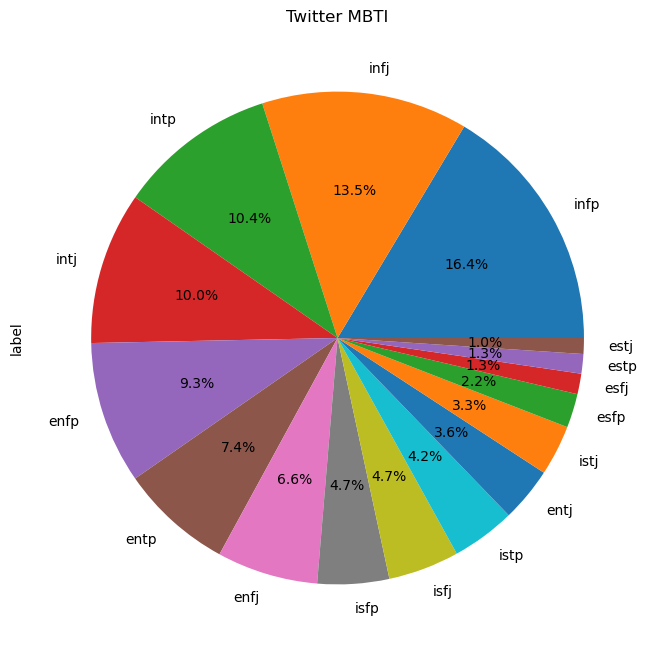

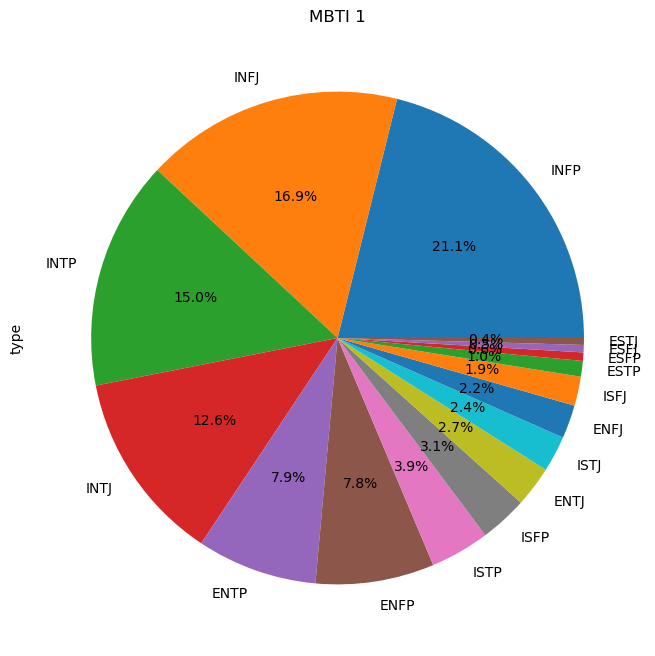

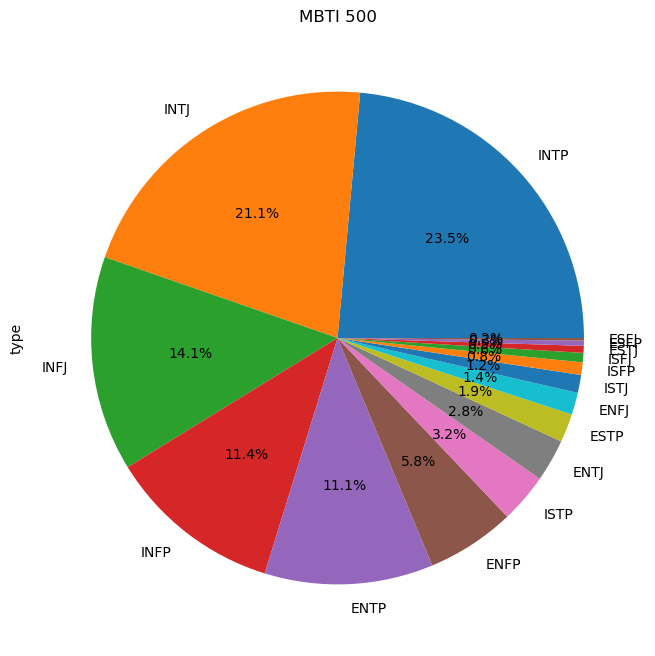

In [3]:
import matplotlib.pyplot as plt

# Plot the number of each personality type
plt.figure(figsize=(16, 8))
dataset_twittermbti['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Twitter MBTI')

plt.figure(figsize=(16, 8))
dataset_mbti1['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='MBTI 1')

plt.figure(figsize=(16, 8))
dataset_mbti500['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='MBTI 500')

Renombramos las columnas para que coincidan

In [4]:
# Rename columns
dataset_twittermbti.rename(
    columns={'label': 'personality', 'text': 'post'}, inplace=True)

dataset_mbti1.rename(
    columns={'type': 'personality', 'posts': 'post'}, inplace=True)

dataset_mbti500.rename(
    columns={'type': 'personality', 'posts': 'post'}, inplace=True)

Concatenamos los 3 datasets y transformamos todas las personalidades a mayúsculas y seleccionamos solo las columnas que nos interesan de personalidad y post.

In [5]:
df = pd.concat(
    [dataset_twittermbti, dataset_mbti500, dataset_mbti1])
df = df[['personality', 'post']]

Como los datasets tienen varios posts por entrada hay que dividirlos para que tengan su entrada propia en el entrenamiento. Además, se descartan los posts con menos de 40 caracteres por ser irrelevantes.

In [6]:
df['post'] = df['post'].str.split("\|\|\|")
df = df.explode('post').reset_index(drop=True)
df = df[df['post'].str.len() >= 40]

Se sustituyen las personalidades por números para que el dataset use menos memoria.

In [7]:
df['personality'] = df['personality'].apply(
    lambda x: personality_num[x.upper()])

Por último guardamos el resultado

7     205398
3     179706
8     154055
4     146998
11    104408
12     94795
15     59308
5      45306
6      43541
2      40261
16     40073
1      33718
10     17192
9      14684
14     11401
13     10612
Name: personality, dtype: int64


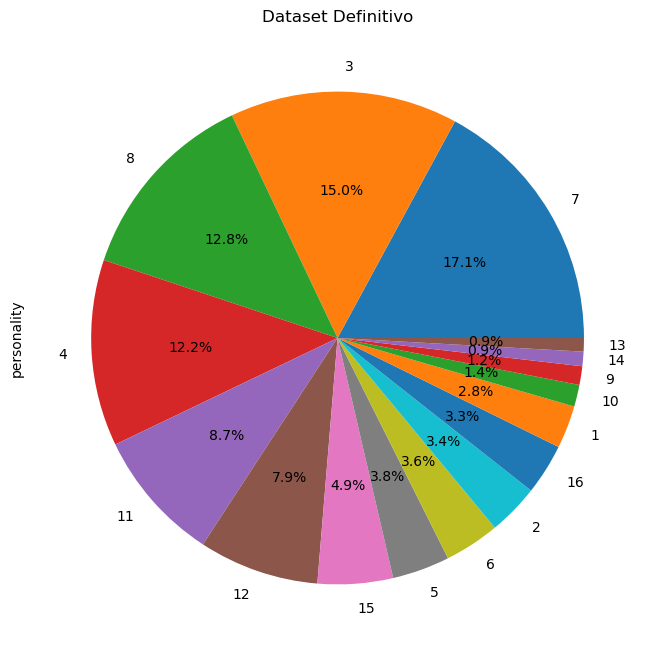

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
df['personality'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Dataset Definitivo')
print(df['personality'].value_counts())

Ahora seleccionamos 2000 muestras de cada una de las personalidades para tener las mismas para todas y que el modelo esté bien balanceado.

1     2000
2     2000
3     2000
4     2000
5     2000
6     2000
7     2000
8     2000
9     2000
10    2000
11    2000
12    2000
13    2000
14    2000
15    2000
16    2000
Name: personality, dtype: int64


<AxesSubplot:title={'center':'Dataset Definitivo'}, ylabel='personality'>

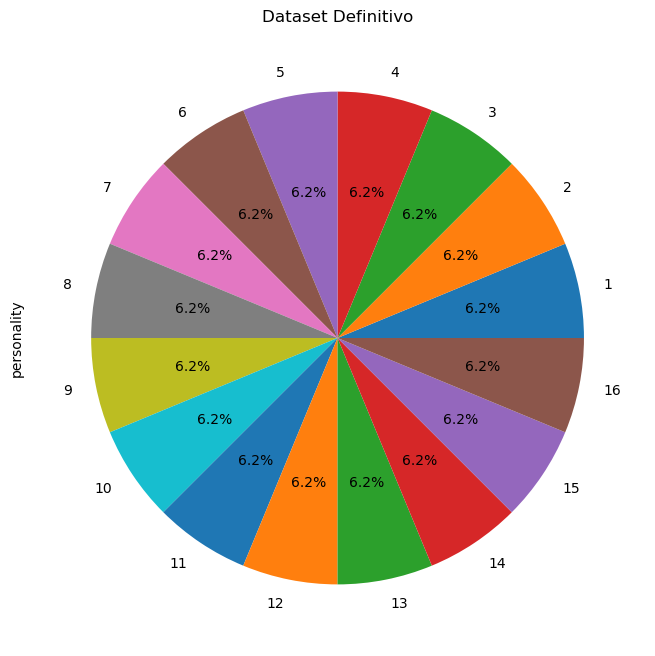

In [9]:
df = df.groupby('personality', group_keys=False).apply(lambda x: x.head(2000))
print(df['personality'].value_counts())
plt.figure(figsize=(16, 8))
df['personality'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Dataset Definitivo')

Guardamos el dataset como CSV

In [10]:
df.to_csv(
    "dataset_definitivo.csv", index=False)

print("Dataset Definitivo")
print(df.shape)
print("Head")
print(df.head())
print("Tail")
print(df.tail())

Dataset Definitivo
(32000, 2)
Head
       personality                                               post
28344            1  not sure if i can keep my word but will be sta...
28345            1      finding nemo hehe :)) https://t.co/YrppzL3xzw
28346            1           IYAK 🥺 soft moments for viceion everyday
28348            1  💭... kian's circle \n\n— angelo rhys navarro\n...
28349            1  💭 ... lei's circle\n\n— lucile alexandra smith...
Tail
       personality                                               post
69375           16  told my mum i finished the saddest book of my ...
69376           16       28 books finsihed ᥫ᭡ https://t.co/xChaPiuDgV
69378           16  i really need to find some inexpensive interes...
69379           16  @taeibev I LIT RALLY CANNOT BREATHE HOW IS HE ...
69380           16  @myhobihansol nothing but pics of his face on ...
